In [1]:
import multiprocessing as mp
import random
import statistics
import sys
import matplotlib.pyplot as plt
import time
from itertools import product

In [2]:
geneSet = " abcdefghijklmnñopqrstuvwxyzABCDEFGHIJKLMNÑOPQRSTUVWXYZ!¡.,"

In [3]:
def obtener_aptitud(prediccion, objetivo):
    '''
    Función que calcula el error de la contraseña dada con respecto 
    a la predicha
    '''
    return sum(1 for esperado, real in zip(prediccion, objetivo)
               if esperado != real)



def _generar_padre(geneSet,objetivo):
    '''
    Genera una string aleatoria a partir de un Set de genes
    '''
    genes = []
    longitud = len(objetivo)
    while len(genes) < longitud:
        tamañoMuestral = min(longitud - len(genes), len(geneSet))
        #Sample nos toma muestra aleatoria sin reemplazo
        genes.extend(random.sample(geneSet, tamañoMuestral)) 
    aptitud = obtener_aptitud(genes,objetivo)
    return Cromosoma(genes, aptitud)


def _mutar(padre, geneSet, objetivo):
    '''
    Función de mutación que reemplaza 1 gen de la contraseña
    '''
    genesDelNiño = padre.Genes[:]
    idx = random.randrange(0, len(padre.Genes))
     #Alterno es un carácter de emergencia por si resulta que 
        #la mutación es el mismo gen
    nuevoGen, alterno = random.sample(geneSet, 2)
    genesDelNiño[idx] = alterno if nuevoGen == genesDelNiño[idx] else nuevoGen
    aptitud = obtener_aptitud(genesDelNiño,objetivo)
    return Cromosoma(genesDelNiño, aptitud)

def _cruzar(padre1,padre2, objetivo):
    '''
    Función de cruza entre dos padres para obtener un hijo a partir de ahí
    '''
    genesDelNiño = padre1.Genes[:]
    idxs = random.sample(range(len(genesDelNiño)),int(len(genesDelNiño)/2))
    for idx in idxs:
        genesDelNiño[idx] = padre2.Genes[idx]
    aptitud = obtener_aptitud(genesDelNiño,objetivo)
    return Cromosoma(genesDelNiño, aptitud)


class Cromosoma:
    '''
    Clase que irá guardando el cromosoma y su distancia c.r al problema 
    a estudiar
    '''
    def __init__(self, genes, aptitud):
        self.Genes = genes
        self.Aptitud = aptitud
        
        
        
def mostrar(candidato, horaInicio):
    '''
    Muestra la evolución del algoritmo
    '''
    if len(candidato.Genes)>50:
        print("String: {}\t Error:{}".format(''.join(candidato.Genes[:50]),
                                             candidato.Aptitud))
    else:
        print("String: {}\t Error:{}".format(''.join(candidato.Genes),
                                             candidato.Aptitud))


In [4]:
    
def sig_generacion(geneSet,poblacion, objetivo,
                   Padres=[],pmutar = 0.5, pelite = 0.4, resultado=True):
    '''
    Dada una generación, regresa la siguiente generación de genes
    '''
    
    if Padres == []:
        Padres = [_generar_padre(geneSet, objetivo)
                  for padre in range(poblacion)]
    Padres = sorted(Padres, key = lambda x: x.Aptitud)
    
    
    
    nueva_generacion = []
    
    for padre in Padres:
        if random.random() < pmutar:
            # Mutar
            gen_a_mutar = 0
            while (random.random()>pelite and gen_a_mutar<len(Padres)-1):
                gen_a_mutar += 1
            
            mutacion = _mutar(Padres[gen_a_mutar] ,geneSet, objetivo)
            nueva_generacion.append(mutacion)
        else:
            # Cruzar
            gen_1 = 0
            while (random.random()<pelite and gen_1<len(Padres)-1):
                gen_1 += 1
            
            gen_2 = 0
            while (random.random()<pelite and gen_1 != gen_2 and 
                   gen_2<len(Padres)-2):
                gen_2 += 1 + (gen_1==gen_2) #Para evitar que sean iguales
                
            cruza = _cruzar(Padres[gen_1],Padres[gen_2],objetivo)
            nueva_generacion.append(cruza)
    
    
    nueva_generacion = sorted(nueva_generacion, key = lambda x: x.Aptitud)
    if resultado: 
        #print([x.Aptitud for x in nueva_generacion])
        mostrar(nueva_generacion[0],time.time())
        
    return nueva_generacion

def iteracion_generaciones(geneSet,poblacion, objetivo, iteraciones, Padres=[],
                           pmutar = 0.5, pelite = 0.8,seed=None):
    random.seed(seed)
    Padres = [_generar_padre(geneSet, objetivo)
                  for padre in range(poblacion)]
    resultado = False
    errores = []
    for iteracion in range(iteraciones):
        
        if iteracion%int(iteraciones/10) == 0:
            resultado = not resultado
            
        Padres = sig_generacion(geneSet,poblacion,objetivo,Padres,
                                resultado=resultado)
        errores.append(Padres[0].Aptitud)
        
        if iteracion%int(iteraciones/10) == 0:
            resultado = not resultado
    plt.plot(errores)
    return Padres[0]

String: Jola	 Error:1
String: hola	 Error:0
String: hola	 Error:0
String: hola	 Error:0
String: hola	 Error:0
String: hola	 Error:0
String: hola	 Error:0
String: hola	 Error:0
String: hola	 Error:0
String: hola	 Error:0


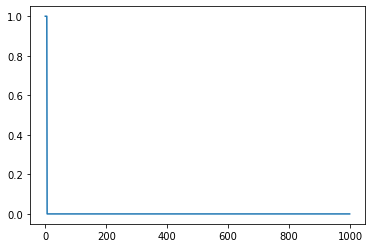

In [5]:


iteracion_generaciones(geneSet,100,'hola',1000)

In [6]:
def crear_hijo(Padres,pmutar,pelite,objetivo):
    
    if random.random() < pmutar:
        # Mutar
        gen_a_mutar = 0
        #mutacion = Padres[gen_a_mutar]
        while (random.random()>pelite and gen_a_mutar<len(Padres)-1):
            gen_a_mutar += 1
    
        mutacion = _mutar(Padres[gen_a_mutar] ,geneSet, objetivo)

        return mutacion
        
    else:
        # Cruzar
        gen_1 = 0
        while (random.random()<pelite and gen_1<len(Padres)-1):
            gen_1 += 1

        gen_2 = 0
        while (random.random()<pelite and gen_1 != gen_2 and 
               gen_2<len(Padres)-2):
            gen_2 += 1 + (gen_1==gen_2) #Para evitar que sean iguales

        cruza = _cruzar(Padres[gen_1],Padres[gen_2],objetivo)
        return cruza
    
def sig_generacion_paralelo(geneSet,poblacion, objetivo,
                   Padres=[],pmutar = 0.5, pelite = 0.4, resultado=True):
    '''
    Dada una generación, regresa la siguiente generación de genes
    '''
    
    if Padres == []:
        Padres = [_generar_padre(longitudObjetivo, geneSet, objetivo)
                  for padre in range(poblacion)]
    Padres = sorted(Padres, key = lambda x: x.Aptitud)
    
    
    
    nueva_generacion = []
    

    # MP
    pool = mp.Pool(mp.cpu_count())
    parametros = [(Padres, pmutar, pelite, objetivo) for _ in range(poblacion)]
    nueva_generacion = pool.starmap(crear_hijo,parametros)
#    pool.close()
#    pool.join()
    #nueva_generacion = nueva_generacion.get(timeout=1)
    nueva_generacion = sorted(nueva_generacion, key = lambda x: x.Aptitud)
    
    if resultado: 
        
        #print([x.Aptitud for x in nueva_generacion])
        mostrar(nueva_generacion[0],time.time())
        
    return nueva_generacion

def iteracion_generaciones_paralelo(geneSet,poblacion, objetivo, iteraciones, 
                                    Padres=[], pmutar = 0.5, pelite = 0.8,
                                    seed=None):
    random.seed(seed)
    Padres = [_generar_padre(geneSet, objetivo)
                  for padre in range(poblacion)]
    resultado = False
    errores = []
    
    for iteracion in range(iteraciones):
        
        #print([padre.Genes for padre in Padres])
        if iteracion%int(iteraciones/10) == 0:
            resultado = not resultado
            
        Padres = sig_generacion_paralelo(geneSet,poblacion,objetivo,Padres,
                                resultado=resultado)
        
        errores.append(Padres[0].Aptitud)
        
        if iteracion%int(iteraciones/10) == 0:
            resultado = not resultado
            
    plt.plot(errores)
    return Padres[0]

In [7]:
def crear_hijo_concurrente(Padres,pmutar,pelite,objetivo,q):
    random.seed()
    if random.random() < pmutar:
        # Mutar
        gen_a_mutar = 0
        #mutacion = Padres[gen_a_mutar]
        while (random.random()>pelite and gen_a_mutar<len(Padres)-1):
            gen_a_mutar += 1
    
        mutacion = _mutar(Padres[gen_a_mutar] ,geneSet, objetivo)

        q.put(mutacion)
        
    else:
        # Cruzar
        gen_1 = 0
        while (random.random()<pelite and gen_1<len(Padres)-1):
            gen_1 += 1

        gen_2 = 0
        while (random.random()<pelite and gen_1 != gen_2 and 
               gen_2<len(Padres)-2):
            gen_2 += 1 + (gen_1==gen_2) #Para evitar que sean iguales

        cruza = _cruzar(Padres[gen_1],Padres[gen_2],objetivo)
        q.put(cruza)
    
def sig_generacion_concurrente(geneSet,poblacion, objetivo,
                   Padres=[],pmutar = 0.5, pelite = 0.4, resultado=True):
    '''
    Dada una generación, regresa la siguiente generación de genes
    '''
    
    if Padres == []:
        Padres = [_generar_padre(longitudObjetivo, geneSet, objetivo)
                  for padre in range(poblacion)]
    Padres = sorted(Padres, key = lambda x: x.Aptitud)
    
    
    
    nueva_generacion = []
    

    # MP
    q = mp.Queue()
    
    procesos = [mp.Process(target=crear_hijo_concurrente,
                           args=(Padres,pmutar,pelite,objetivo,q)) 
                for i in range(poblacion)]
    
    for proceso in procesos:
        proceso.start()
        
    for proceso in procesos:
        proceso.join()
        
    while q.empty() is False:
        nueva_generacion.append(q.get())
    

    nueva_generacion = sorted(nueva_generacion, key = lambda x: x.Aptitud)
    
    if resultado: 
        
        #print([x.Aptitud for x in nueva_generacion])
        mostrar(nueva_generacion[0],time.time())
        
    return nueva_generacion

def iteracion_generaciones_concurrente(geneSet,poblacion, objetivo, iteraciones, 
                                    Padres=[], pmutar = 0.5, pelite = 0.8,
                                    seed=None):
    random.seed(seed)
    Padres = [_generar_padre(geneSet, objetivo)
                  for padre in range(poblacion)]
    resultado = False
    errores = []
    
    for iteracion in range(iteraciones):
        
        #print([padre.Genes for padre in Padres])
        if iteracion%int(iteraciones/10) == 0:
            resultado = not resultado
            
        Padres = sig_generacion_concurrente(geneSet,poblacion,objetivo,Padres,
                                resultado=resultado)
        
        errores.append(Padres[0].Aptitud)
        
        if iteracion%int(iteraciones/10) == 0:
            resultado = not resultado
            
    plt.plot(errores)
    return Padres[0]

In [8]:
def crear_hijos_concurrente2(Padres,pmutar,pelite,objetivo,q,num_hijos):
    hijos = []
    random.seed()
    for hijo in range(num_hijos):
        
        if random.random() < pmutar:
            # Mutar
            gen_a_mutar = 0
            #mutacion = Padres[gen_a_mutar]
            while (random.random()>pelite and gen_a_mutar<len(Padres)-1):
                gen_a_mutar += 1
            mutacion = _mutar(Padres[gen_a_mutar] ,geneSet, objetivo)
            hijos.append(mutacion)
            

        else:
            # Cruzar
            
            gen_1 = 0
            while (random.random()<pelite and gen_1<len(Padres)-1):
                gen_1 += 1

            gen_2 = 0
            while (random.random()<pelite and gen_1 != gen_2 and 
                   gen_2<len(Padres)-2):
                gen_2 += 1 + (gen_1==gen_2) #Para evitar que sean iguales

            cruza = _cruzar(Padres[gen_1],Padres[gen_2],objetivo)
            hijos.append(cruza)
    
    q.put(hijos)

def sig_generacion_concurrente2(geneSet,poblacion, objetivo,
                   Padres=[],pmutar = 0.5, pelite = 0.4, resultado=True):
    '''
    Dada una generación, regresa la siguiente generación de genes
    '''
    
    if Padres == []:
        Padres = [_generar_padre(longitudObjetivo, geneSet, objetivo)
                  for padre in range(poblacion)]
    Padres = sorted(Padres, key = lambda x: x.Aptitud)
    
    
    
    nueva_generacion = []
    

    # MP
    q = mp.Queue()
    intervalo = int(poblacion/mp.cpu_count())
    procesos = [mp.Process(target=crear_hijos_concurrente2,
                           args=(Padres,pmutar,pelite,objetivo,q,intervalo)) 
                for i in range(mp.cpu_count())]
    
    for proceso in procesos:
        proceso.start()

    
    for i in range(len(procesos)):
        procesos[i].join(timeout=1)
    
    while q.empty() is False:
   #     print(nueva_generacion)
        nueva_generacion += q.get()        
        

   


    nueva_generacion = sorted(nueva_generacion, key = lambda x: x.Aptitud)
    
    if resultado: 
        
        #print([x.Aptitud for x in nueva_generacion])
        mostrar(nueva_generacion[0],time.time())
        
    return nueva_generacion

def iteracion_generaciones_concurrente2(geneSet,poblacion, objetivo, iteraciones, 
                                    Padres=[], pmutar = 0.5, pelite = 0.8,
                                    seed=None):
    random.seed(seed)
    Padres = [_generar_padre(geneSet, objetivo) for padre in range(poblacion)]
    resultado = False
    errores = []
    
    for iteracion in range(iteraciones):
        
        #print([padre.Genes for padre in Padres])
        if iteracion%int(iteraciones/10) == 0:
            resultado = not resultado
            
        Padres = sig_generacion_concurrente2(geneSet,poblacion,objetivo,Padres,resultado=resultado)
        
        errores.append(Padres[0].Aptitud)
        
        if iteracion%int(iteraciones/10) == 0:
            resultado = not resultado
            
    plt.plot(errores)
    return Padres[0]

In [9]:
print(random.randint(0,2**32))

1933685776


In [10]:
import psutil
import os
import matplotlib.pyplot as plt

def cpu_usage(q,finish):
    
    usage = []    
    while not finish.value:
        time.sleep(0.05)
        usage.append(psutil.cpu_percent(percpu=True))
    #print('Put')
    q.put(usage)
    return





def comparacion(objetivo,poblacion=mp.cpu_count(), iteraciones=500,
                concurrente1=True,concurrente2=True):
    
    geneSet = " abcdefghijklmnñopqrstuvwxyzABCDEFGHIJKLMNÑOPQRSTUVWXYZ!¡.,"
    usages = []
    
    q = mp.Queue()
    
    finish = mp.Value('i', False)
    cpu_process_secuencial = mp.Process(target=cpu_usage,args=(q,finish))
    cpu_process_secuencial.start()
    start = time.time()
    print('Secuencial:')
    iteracion_generaciones(geneSet,poblacion,objetivo,iteraciones,
                           pmutar=0.8,pelite=0.5)
    end_secuencial = (time.time()-start)
    finish.value = True    
    cpu_process_secuencial.join()
    usage_secuencial= q.get()
    usages.append((usage_secuencial,'Secuencial'))
    
    end_concurrente1 = 'No aplica'
    
    if concurrente1:
        print('Concurrente1:')
        finish.value = False
        cpu_process_concurrente = mp.Process(target=cpu_usage,args=(q,finish))
        cpu_process_concurrente.start()
        start_concurrente = time.time()
        iteracion_generaciones_concurrente(geneSet,poblacion,objetivo,iteraciones,
                                           pmutar=0.8,pelite=0.5)
        end_concurrente1 = (time.time()- start_concurrente)
        finish.value = True
        cpu_process_concurrente.join()
        usage_concurrente= q.get()
        usages.append((usage_concurrente,'Concurrente1'))
    
    end_concurrente2 = 'No aplica'
    if concurrente2:
        print('Concurrente2:')
        finish.value = False
        cpu_process_concurrente2 = mp.Process(target=cpu_usage,args=(q,finish))
        cpu_process_concurrente2.start()
        start_concurrente2 = time.time()
        iteracion_generaciones_concurrente2(geneSet,poblacion,objetivo,iteraciones,
                                           pmutar=0.8,pelite=0.5)
        end_concurrente2 = (time.time()- start_concurrente2)
        finish.value = True
        cpu_process_concurrente2.join()
        usage_concurrente2= q.get()
        usages.append((usage_concurrente2,'Concurrente2'))
        
    
    finish.value = False
    print('Pool:')
    cpu_process_paralelo = mp.Process(target=cpu_usage,args=(q,finish))
    cpu_process_paralelo.start()
    start_paralelo = time.time()
    iteracion_generaciones_paralelo(geneSet,poblacion,objetivo,iteraciones,
                                    pmutar=0.8,pelite=0.5)
    end_paralelo = (time.time()- start_paralelo)
    finish.value = True
    usage_paralelo= q.get()
    cpu_process_paralelo.join()
    usages.append((usage_paralelo,'paralelo'))
    
    print(f'Secuencial: {end_secuencial}\t Concurrente1:{end_concurrente1}\n Concurrente2:{end_concurrente2}\t Paralelo: {end_paralelo}')
    
    return usages

In [11]:
objetivo = open('Lorem ipsum')
objetivo = objetivo.read()[:500]

#secuencial, concurrente, paralelo = comparacion(objetivo,iteraciones=200)

In [12]:

def plot_cpu(objetivo,poblacion,iteraciones,
            concurrente1=True,concurrente2=True):
    uso_cpu = comparacion(objetivo,poblacion,
                                                    iteraciones,concurrente1,
                                                    concurrente2)
    

    for modelo,nombre in uso_cpu:
        plt.figure(figsize=(15,5))
        usage_max = min(len(modelo),50)
        usage = modelo[:usage_max]
        for i in range(mp.cpu_count()):
            plt.plot([cpu[i] for cpu in usage], label = f'CPU{i}')
        plt.legend(loc='best')
        plt.title(f'Uso del cpu en modelo {nombre}')
        plt.show()

In [13]:
plot_cpu(objetivo,500,200,concurrente1=False)

Secuencial:
String: T!yXmNoiL¡hlCM..rVeNV! Hzu,IfOWbSxaAnwDGgCbAZOLdFv	 Error:473
String: R!¡pmNoiLc TdlL.rVeiQxwMDu,gjYhbAxaAnKDGhCbpZOLdFv	 Error:447
String: R!¡pmNoiLc TdlL.rVeiQxaMDu,gjYhbAxaAnKDGhCipZOLdFv	 Error:426
String: R!¡pm oiLc Tdll.rVeiQxaMDu,gjYhbAxaAnKDGhdipZOLdFv	 Error:402
String: R!¡pm oiLc Tdll.rVsiQ aMDu,gjYhbAxaAnKDGhdipZOLiFv	 Error:380
String: R!¡pm oiLc Tdll.rVsiQ aMDu,gjYhbAxaAnKDGhdipZOLiFv	 Error:361
String: R!¡pm oiLc Tdll.rVsiQ aMDu,gjYhbAxaAnKDGadipZOLiFv	 Error:339
String: R!¡em oiLcmTdll.rVsiQ aMDu,gcYhbAcaAnKDGadipZOLiFv	 Error:317
String: L!¡em oiLcmTdll.rVsiQ aMDu,gcYhbAcaAnKDGadipZOLinv	 Error:295
String: L!¡em ipLcmTdll.rVsiQ aMDu,gcYhbAcaAnKDGadipZsLinv	 Error:276
Concurrente2:
Here
HereHereHere


HereHere
Here

Here


Process Process-8:
Process Process-9:
Process Process-5:
Process Process-6:
Process Process-7:
Process Process-10:
Process Process-4:
Process Process-2:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):


In [ ]:
geneSet = " abcdefghijklmnñopqrstuvwxyzABCDEFGHIJKLMNÑOPQRSTUVWXYZ!¡.,"
objetivo = open('Lorem ipsum')
objetivo = objetivo.read()[:500]

iteracion_generaciones_concurrente2(geneSet,1000,objetivo,1000)